In [3]:
import numpy as np
import pandas as pd 
import re
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD, NMF
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from string import punctuation
np.random.seed(42)
random.seed(42)

# Part 1

Question #1

In [4]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
train_data = fetch_20newsgroups(categories = categories, remove=('headers','footers'))

In [25]:
vectorizer = CountVectorizer(min_df=3, stop_words='english')
tfidf_transformer = TfidfTransformer()
train_data_feat_vec = vectorizer.fit_transform(train_data.data)
train_data_feat = tfidf_transformer.fit_transform(train_data_feat_vec)

In [26]:
train_data_feat.shape

(4732, 17131)

Question #2

In [5]:
from sklearn.cluster import KMeans,  AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score

In [28]:
kmeans = KMeans(n_clusters=2, max_iter = 5000, n_init = 30, random_state=0).fit(train_data_feat)

In [29]:
y_train = []
for target in train_data.target:
  if target < 4:
    y_train.append(0)
  else:
    y_train.append(1)

In [30]:
from plotmat import plot_mat

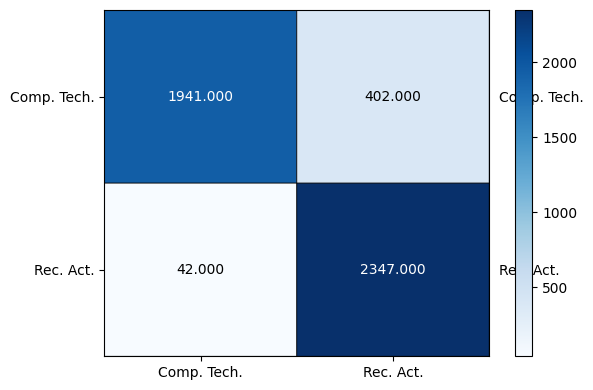

In [31]:
#plot_mat(contingency_matrix(y_train,kmeans.labels_), size=(6,4))
plot_mat(contingency_matrix(y_train,kmeans.labels_),size=(6,4),xticklabels = ['Comp. Tech.','Rec. Act.'],yticklabels = ['Comp. Tech.','Rec. Act.'])


Question #3

In [32]:
print("Homogeneity: ", homogeneity_score(y_train,kmeans.labels_))
print("Completeness: ", completeness_score(y_train,kmeans.labels_))
print("V-measure: ", v_measure_score(y_train,kmeans.labels_))
print("Adjusted Rand Index: ", adjusted_rand_score(y_train,kmeans.labels_))
print("Adjusted Mutual Information Score: ", adjusted_mutual_info_score(y_train,kmeans.labels_))

Homogeneity:  0.5891851383382101
Completeness:  0.6005467399371613
V-measure:  0.5948116891031819
Adjusted Rand Index:  0.6598278657872265
Adjusted Mutual Information Score:  0.5947492978713683


Question #4

In [33]:
from sklearn.decomposition import TruncatedSVD

num_comp = np.arange(1,1000,100)
exp_var = []
for k in num_comp:
  lsi = TruncatedSVD(n_components=k)
  lsi.fit_transform(train_data_feat) 
  exp_var.append(lsi.explained_variance_ratio_.sum())
exp_var = np.array(exp_var)

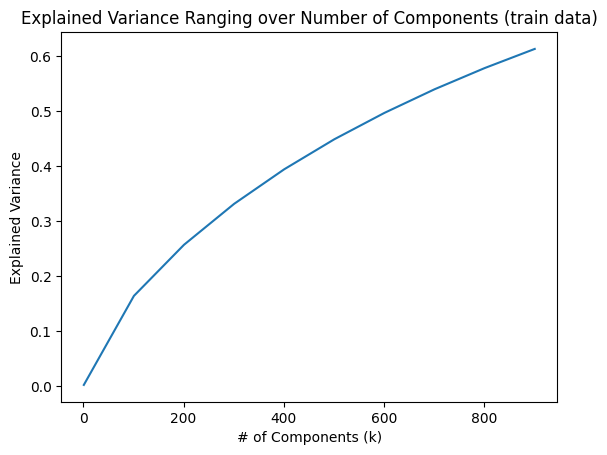

In [34]:
plt.plot(num_comp,exp_var)
plt.xlabel("# of Components (k)")
plt.ylabel("Explained Variance")
plt.title("Explained Variance Ranging over Number of Components (train data)")
plt.show()

Question #5

In [35]:
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 300]
svd_hs = []
svd_cs = []
svd_vs = []
svd_ari = []
svd_ms = []
nmf_hs = []
nmf_cs = []
nmf_vs = []
nmf_ari = []
nmf_ms = []

for r in k:
  print("SVD component: ", r)
  svd = TruncatedSVD(n_components=r)
  svd_km = svd.fit_transform(train_data_feat)
  kmean_svd = kmeans.fit(svd_km)
  svd_hs.append(homogeneity_score(y_train, kmean_svd.labels_))
  svd_cs.append(completeness_score(y_train, kmean_svd.labels_))
  svd_vs.append(v_measure_score(y_train, kmean_svd.labels_))
  svd_ari.append(adjusted_rand_score(y_train, kmean_svd.labels_))
  svd_ms.append(adjusted_mutual_info_score(y_train, kmean_svd.labels_))    
  print("NMF component: ", r)
  nmf = NMF(n_components=r)
  nmf_km = nmf.fit_transform(train_data_feat)
  kmean_nmf = kmeans.fit(nmf_km)
  nmf_hs.append(homogeneity_score(y_train, kmean_nmf.labels_))
  nmf_cs.append(completeness_score(y_train, kmean_nmf.labels_))
  nmf_vs.append(v_measure_score(y_train, kmean_nmf.labels_))
  nmf_ari.append(adjusted_rand_score(y_train, kmean_nmf.labels_))
  nmf_ms.append(adjusted_mutual_info_score(y_train, kmean_nmf.labels_))



SVD component:  1
NMF component:  1
SVD component:  2
NMF component:  2
SVD component:  3
NMF component:  3
SVD component:  4
NMF component:  4
SVD component:  5
NMF component:  5
SVD component:  6
NMF component:  6
SVD component:  7
NMF component:  7
SVD component:  8
NMF component:  8
SVD component:  9
NMF component:  9
SVD component:  10
NMF component:  10
SVD component:  50
NMF component:  50


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


SVD component:  100
NMF component:  100


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


SVD component:  300
NMF component:  300


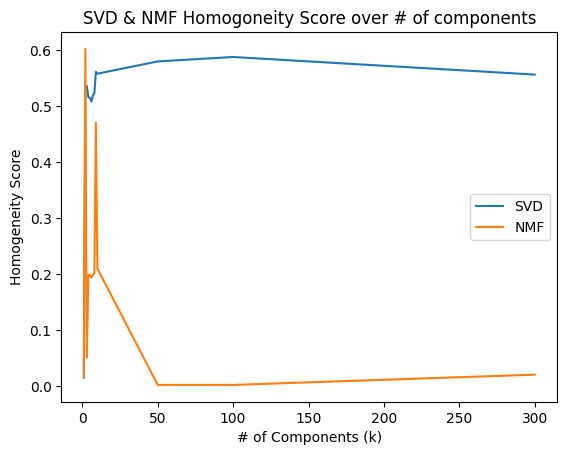

In [36]:
#Homogeneity
plt.plot(k,svd_hs, label = 'SVD')
plt.plot(k,nmf_hs, label = 'NMF')
plt.xlabel("# of Components (k)")
plt.ylabel("Homogeneity Score")
plt.title("SVD & NMF Homogoneity Score over # of components")
plt.legend()
plt.show()

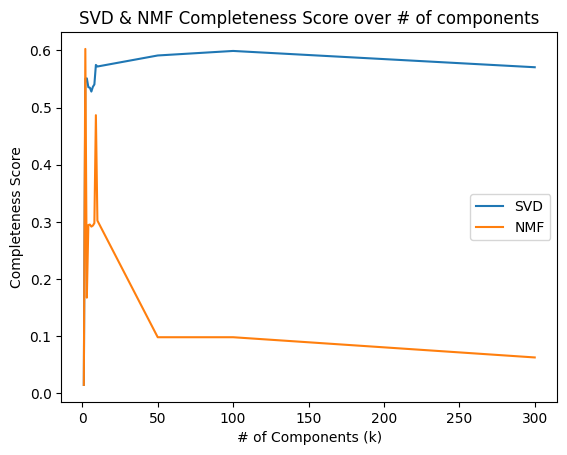

In [37]:
#Completeness
plt.plot(k,svd_cs, label = 'SVD')
plt.plot(k,nmf_cs, label = 'NMF')
plt.xlabel("# of Components (k)")
plt.ylabel("Completeness Score")
plt.title("SVD & NMF Completeness Score over # of components")
plt.legend()
plt.show()

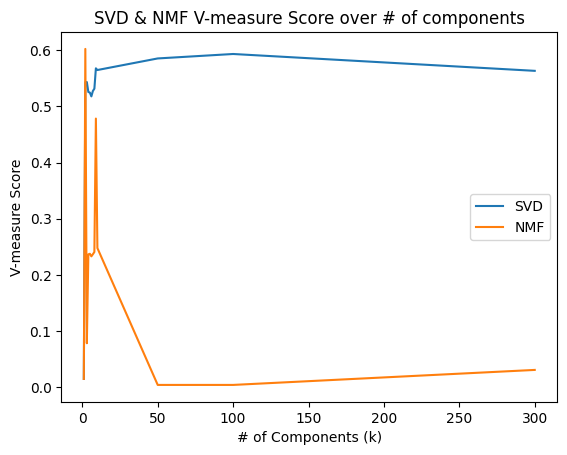

In [38]:
#V-measure score
plt.plot(k,svd_vs, label = 'SVD')
plt.plot(k,nmf_vs, label = 'NMF')
plt.xlabel("# of Components (k)")
plt.ylabel("V-measure Score")
plt.title("SVD & NMF V-measure Score over # of components")
plt.legend()
plt.show()

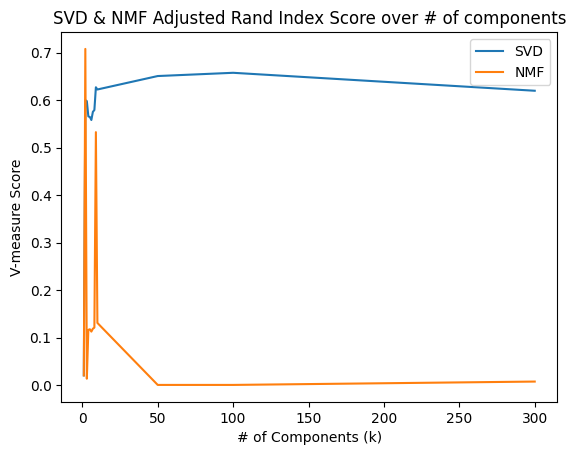

In [39]:
#Adjusted Rand Index score
plt.plot(k,svd_ari, label = 'SVD')
plt.plot(k,nmf_ari, label = 'NMF')
plt.xlabel("# of Components (k)")
plt.ylabel("V-measure Score")
plt.title("SVD & NMF Adjusted Rand Index Score over # of components")
plt.legend()
plt.show()

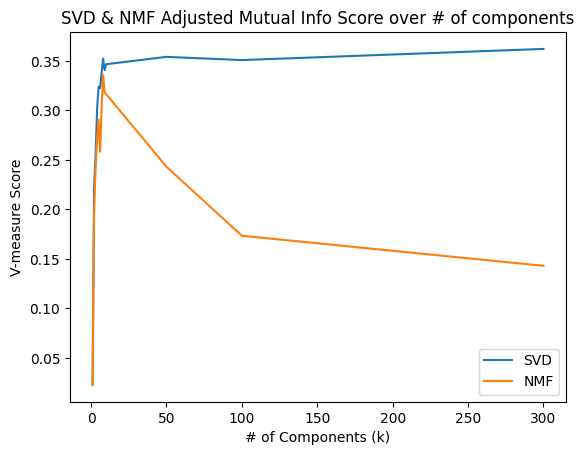

In [93]:
#Adjusted Rand Index score
plt.plot(k,svd_ms, label = 'SVD')
plt.plot(k,nmf_ms, label = 'NMF')
plt.xlabel("# of Components (k)")
plt.ylabel("V-measure Score")
plt.title("SVD & NMF Adjusted Mutual Info Score over # of components")
plt.legend()
plt.show()

Question #8

In [40]:
best_svd = TruncatedSVD(n_components=50)
best_svd_km = best_svd.fit_transform(train_data_feat)
y_svd = kmeans.fit_predict(best_svd_km)
best_nmf = NMF(n_components=2)
best_nmf_km = best_nmf.fit_transform(train_data_feat)
best_nmf_svd = kmeans.fit_predict(best_nmf_km)

ValueError: 'c' argument has 4732 elements, which is inconsistent with 'x' and 'y' with size 11314.

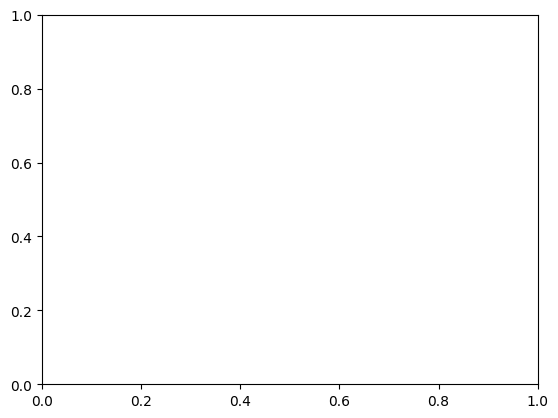

In [94]:
plt.scatter(best_svd_km[:,0],best_svd_km[:,1],c=y_train)
plt.title("SVD Data Visualization with K-means")
plt.show()

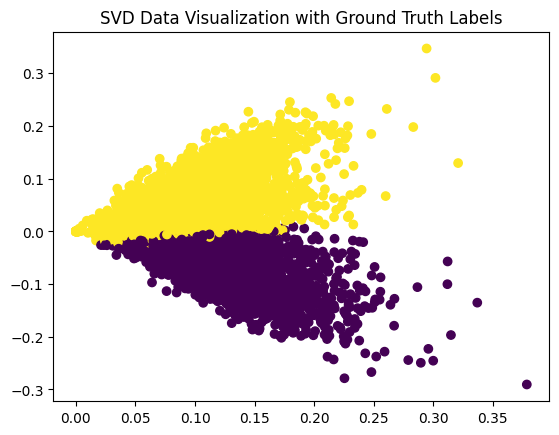

In [42]:
plt.scatter(best_svd_km[:,0],best_svd_km[:,1],c=y_svd)
plt.title("SVD Data Visualization with Ground Truth Labels")
plt.show()

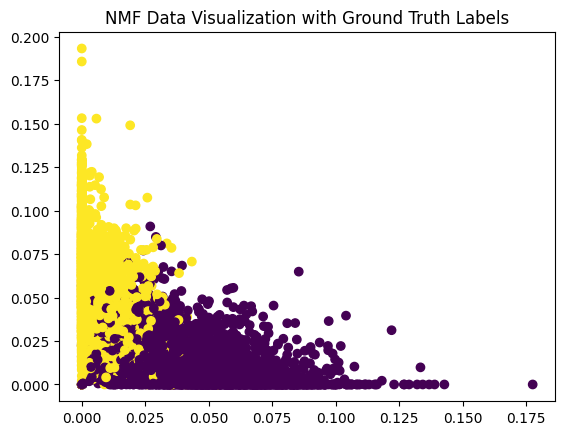

In [43]:
plt.scatter(best_nmf_km[:,0],best_nmf_km[:,1],c=y_train)
plt.title("NMF Data Visualization with Ground Truth Labels")
plt.show()

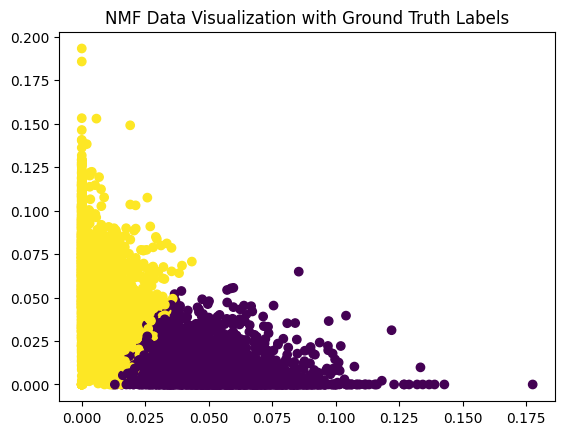

In [44]:
plt.scatter(best_nmf_km[:,0],best_nmf_km[:,1],c=y_svd)
plt.title("NMF Data Visualization with Ground Truth Labels")
plt.show()

Question #10

In [6]:
train_data = fetch_20newsgroups(remove=('headers','footers'))
vectorizer = CountVectorizer(min_df=3, stop_words = 'english')
tfidf_transformer = TfidfTransformer()
train_data_feat_vec = vectorizer.fit_transform(train_data.data)
train_data_feat = tfidf_transformer.fit_transform(train_data_feat_vec)
kmeans = KMeans(n_clusters=20, max_iter = 5000, n_init = 30, random_state=0).fit(train_data_feat)

In [60]:
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 300]
svd_hs = []
svd_cs = []
svd_vs = []
svd_ari = []
svd_ms = []
nmf_hs = []
nmf_cs = []
nmf_vs = []
nmf_ari = []
nmf_ms = []

for r in k:
  print("SVD component: ", r)
  svd = TruncatedSVD(n_components=r)
  svd_km = svd.fit_transform(train_data_feat)
  kmean_svd = kmeans.fit(svd_km)
  svd_hs.append(homogeneity_score(train_data.target, kmean_svd.labels_))
  svd_cs.append(completeness_score(train_data.target, kmean_svd.labels_))
  svd_vs.append(v_measure_score(train_data.target, kmean_svd.labels_))
  svd_ari.append(adjusted_rand_score(train_data.target, kmean_svd.labels_))
  svd_ms.append(adjusted_mutual_info_score(train_data.target, kmean_svd.labels_))    
  print("NMF component: ", r)
  nmf = NMF(n_components=r)
  nmf_km = nmf.fit_transform(train_data_feat)
  kmean_nmf = kmeans.fit(nmf_km)
  nmf_hs.append(homogeneity_score(train_data.target, kmean_nmf.labels_))
  nmf_cs.append(completeness_score(train_data.target, kmean_nmf.labels_))
  nmf_vs.append(v_measure_score(train_data.target, kmean_nmf.labels_))
  nmf_ari.append(adjusted_rand_score(train_data.target, kmean_nmf.labels_))
  nmf_ms.append(adjusted_mutual_info_score(train_data.target, kmean_nmf.labels_))

SVD component:  1
NMF component:  1
SVD component:  2
NMF component:  2
SVD component:  3
NMF component:  3
SVD component:  4
NMF component:  4
SVD component:  5
NMF component:  5
SVD component:  6
NMF component:  6
SVD component:  7
NMF component:  7
SVD component:  8
NMF component:  8
SVD component:  9
NMF component:  9
SVD component:  10
NMF component:  10
SVD component:  50
NMF component:  50
SVD component:  100
NMF component:  100
SVD component:  300
NMF component:  300


In [61]:
print('SVD Metrics')
print("SVD Homogeneity Scores: ", svd_hs )
print("SVD Completeness Scores: ", svd_cs)
print("SVD V-measure Scores: ", svd_vs)
print("SVD Adjusted Rand Index Scores: ", svd_ari)
print("SVD Adjusted Mutual Information Scores: ", svd_ms)

SVD Metrics
SVD Homogeneity Scores:  [0.027046445140724497, 0.2187963936907766, 0.2512084973053179, 0.2950125236546891, 0.3140428295328658, 0.31284497277432555, 0.32714439933798106, 0.3405158697699826, 0.33235368366895046, 0.33655127384556494, 0.32902722799494327, 0.3222857121736783, 0.32029024861918187]
SVD Completeness Scores:  [0.029381465602290123, 0.23171290801753183, 0.26628436948630124, 0.3161051039937978, 0.3428493931667494, 0.34107680300235804, 0.35796856812068223, 0.37286423978249966, 0.35708419750613174, 0.36508538757190884, 0.3920751970212236, 0.39425175131950446, 0.4269398528669931]
SVD V-measure Scores:  [0.028165643104721808, 0.22506948670579965, 0.2585268343089405, 0.3051948111140994, 0.32781448710482664, 0.32635146007331167, 0.3418630729881302, 0.35595663298016444, 0.3442753920595659, 0.35023811897599827, 0.35779498380849917, 0.3546547470952586, 0.3660041835794169]
SVD Adjusted Rand Index Scores:  [0.00542988257375794, 0.06657679680243928, 0.0828343169564396, 0.1101456

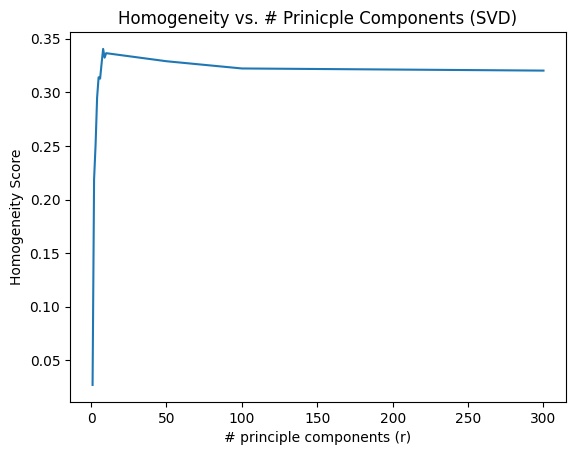

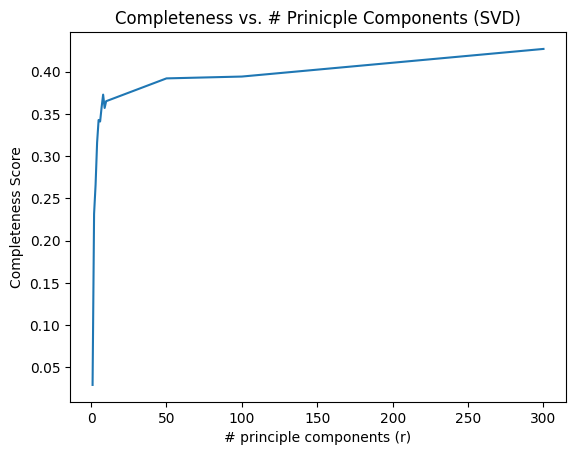

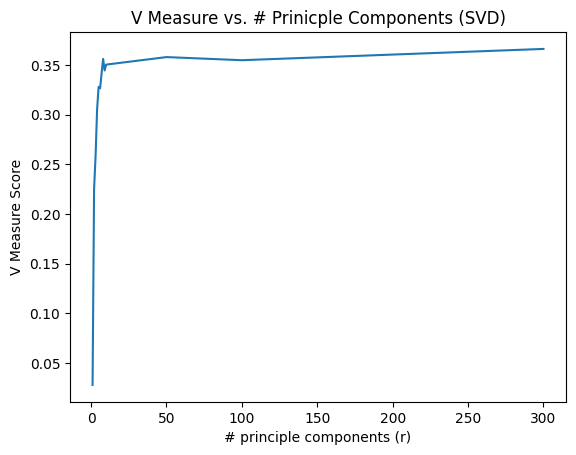

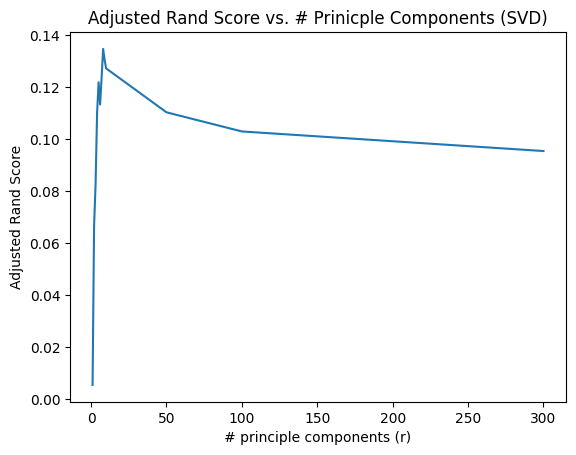

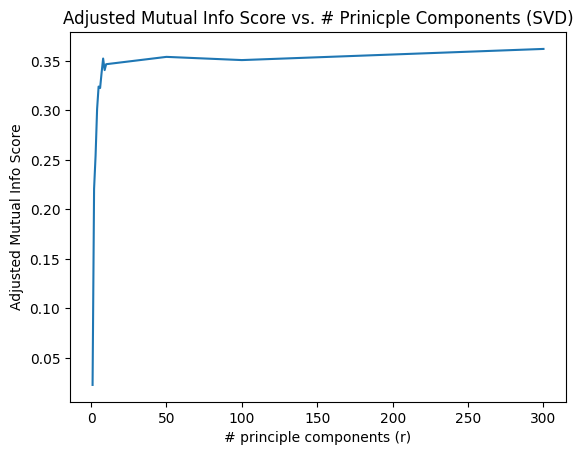

In [62]:
plt.plot(k,svd_hs)
plt.xlabel("# principle components (r)")
plt.ylabel("Homogeneity Score")
plt.title("Homogeneity vs. # Prinicple Components (SVD)")
plt.show()

plt.plot(k,svd_cs)
plt.xlabel("# principle components (r)")
plt.ylabel("Completeness Score")
plt.title("Completeness vs. # Prinicple Components (SVD)")
plt.show()

plt.plot(k,svd_vs)
plt.xlabel("# principle components (r)")
plt.ylabel("V Measure Score")
plt.title("V Measure vs. # Prinicple Components (SVD)")
plt.show()

plt.plot(k,svd_ari)
plt.xlabel("# principle components (r)")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score vs. # Prinicple Components (SVD)")
plt.show()

plt.plot(k,svd_ms)
plt.xlabel("# principle components (r)")
plt.ylabel("Adjusted Mutual Info Score")
plt.title("Adjusted Mutual Info Score vs. # Prinicple Components (SVD)")
plt.show()

In [63]:
print('NMF Metrics')
print("NMF Homogeneity Scores: ", nmf_hs )
print("NMF Completeness Scores: ", nmf_cs)
print("NMF V-measure Scores: ", nmf_vs)
print("NMF Adjusted Rand Index Scores: ", nmf_ari)
print("NMF Adjusted Mutual Information Scores: ", nmf_ms)

NMF Metrics
NMF Homogeneity Scores:  [0.027049692097599557, 0.1935348525432027, 0.23367049508770824, 0.258323948532742, 0.2731122279576171, 0.24821518125410327, 0.2938360213767625, 0.3149102506444818, 0.30229186391566826, 0.3015800935390978, 0.20792459899902946, 0.12802873386114633, 0.1098322043131551]
NMF Completeness Scores:  [0.029384136865384224, 0.20519857283106946, 0.2571932257379456, 0.29521994175903504, 0.3208219116779026, 0.2784539781503326, 0.32354269197337854, 0.36812087868221366, 0.34450444582701706, 0.3413280060563423, 0.30743728090433414, 0.3022882733640125, 0.23406166003792667]
NMF V-measure Scores:  [0.028168631098333435, 0.19919611955110056, 0.24486824282023634, 0.2755423097547029, 0.29505085237142264, 0.2624664969396299, 0.30797465250820094, 0.3394429132023807, 0.3220206716940413, 0.32022533876540243, 0.24807334745585805, 0.17987476325617968, 0.14950838460390195]
NMF Adjusted Rand Index Scores:  [0.0054334437860695944, 0.0563603746612687, 0.07086539654740259, 0.083687

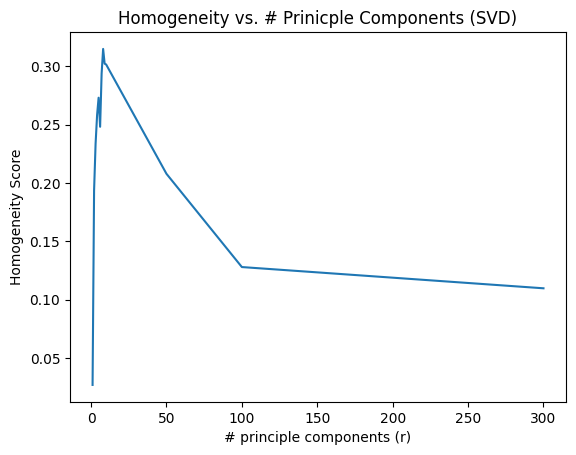

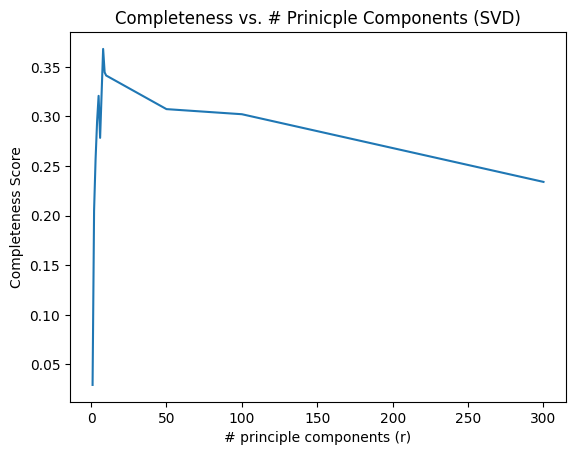

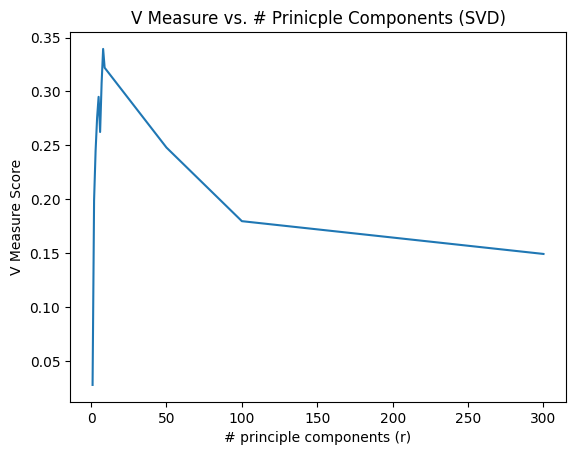

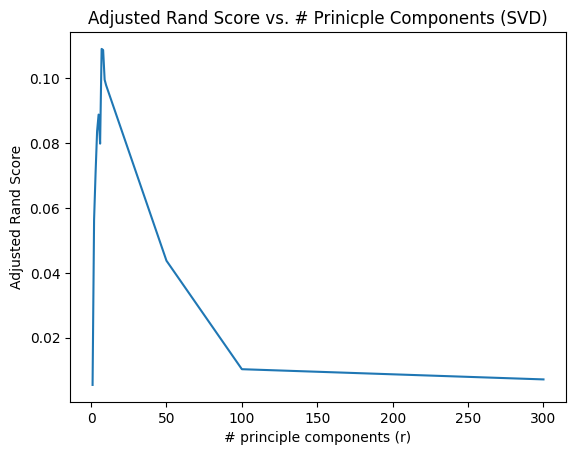

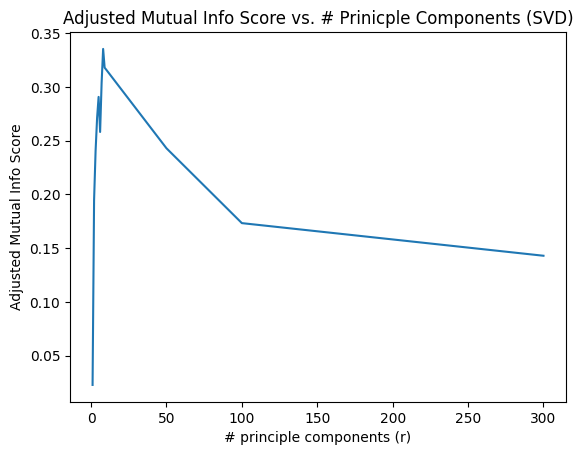

In [64]:
plt.plot(k,nmf_hs)
plt.xlabel("# principle components (r)")
plt.ylabel("Homogeneity Score")
plt.title("Homogeneity vs. # Prinicple Components (SVD)")
plt.show()

plt.plot(k,nmf_cs)
plt.xlabel("# principle components (r)")
plt.ylabel("Completeness Score")
plt.title("Completeness vs. # Prinicple Components (SVD)")
plt.show()

plt.plot(k,nmf_vs)
plt.xlabel("# principle components (r)")
plt.ylabel("V Measure Score")
plt.title("V Measure vs. # Prinicple Components (SVD)")
plt.show()

plt.plot(k,nmf_ari)
plt.xlabel("# principle components (r)")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score vs. # Prinicple Components (SVD)")
plt.show()

plt.plot(k,nmf_ms)
plt.xlabel("# principle components (r)")
plt.ylabel("Adjusted Mutual Info Score")
plt.title("Adjusted Mutual Info Score vs. # Prinicple Components (SVD)")
plt.show()

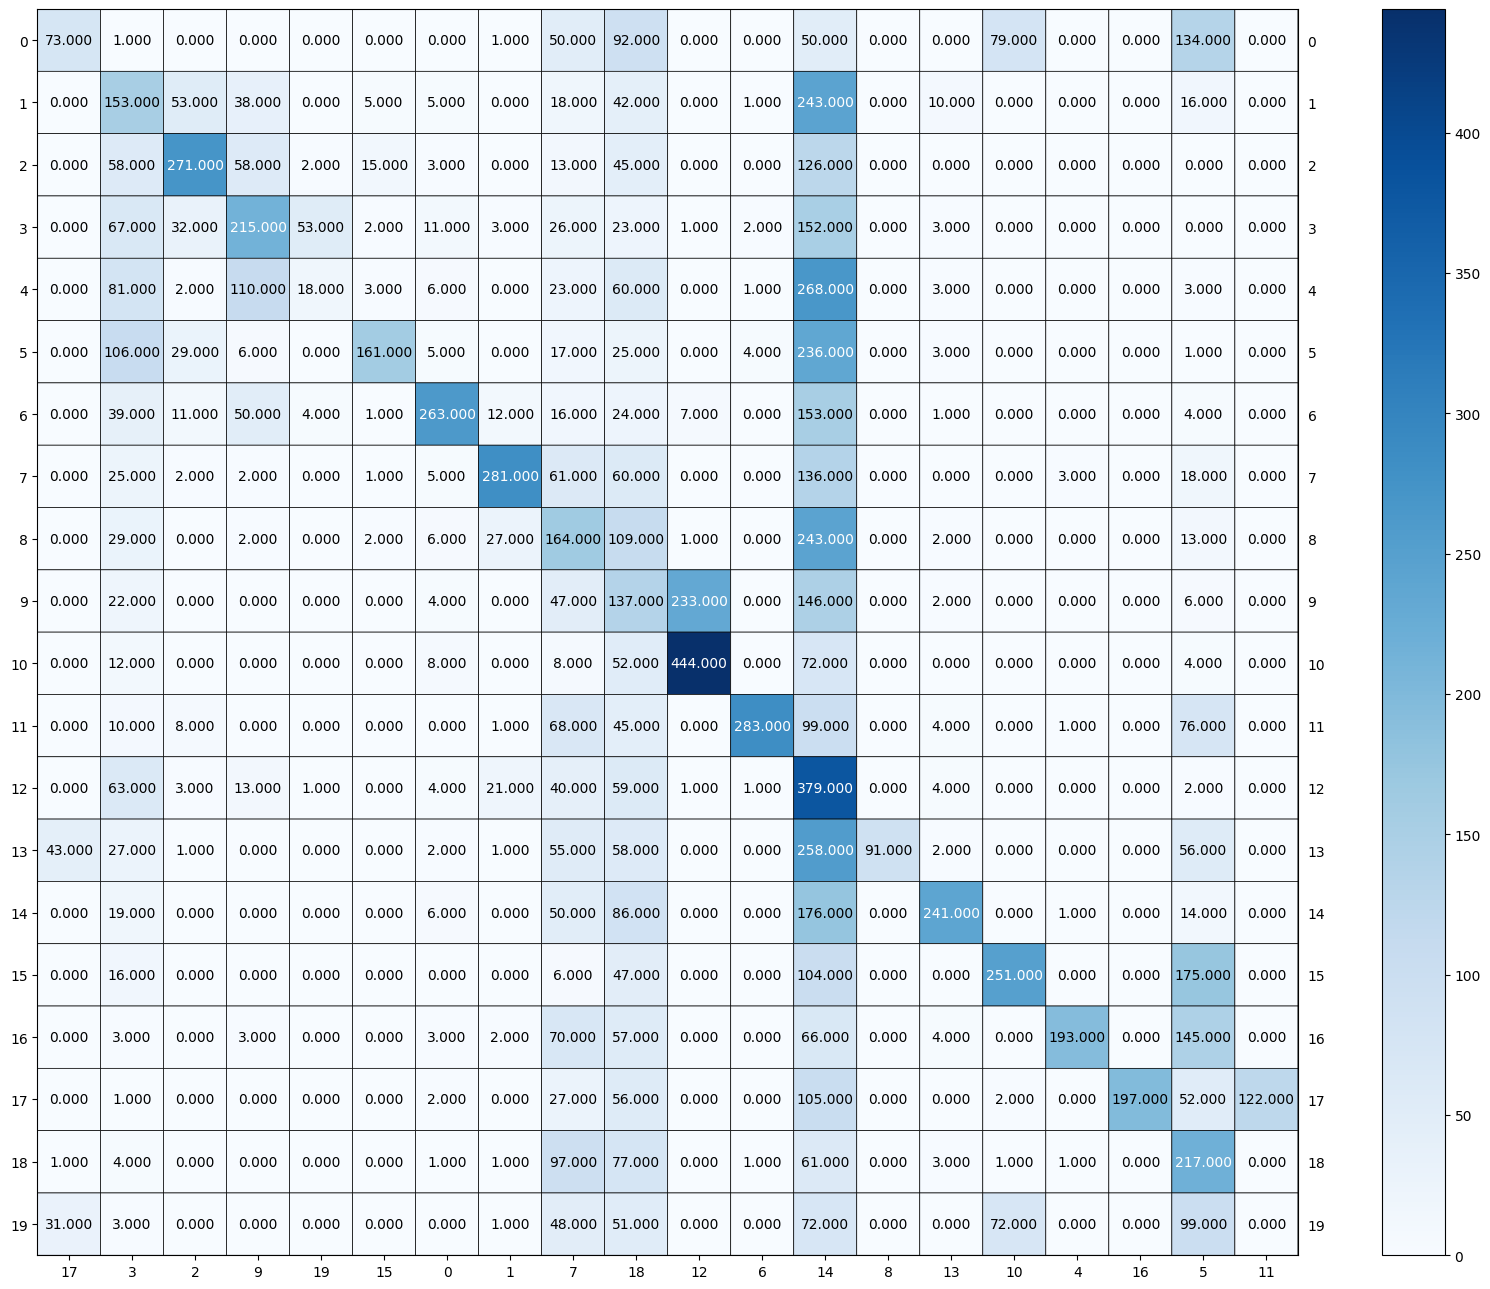

In [65]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

best_svd = TruncatedSVD(n_components=50, random_state=0)
best_svd_km = best_svd.fit_transform(train_data_feat)
kmean_svd = kmeans.fit(best_svd_km)
cm = confusion_matrix(train_data.target, kmeans.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,13))

Question #11

In [9]:
!pip install umap-learn
import umap.umap_ as umap

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [67]:
n_components = [5, 20, 200]
umap_euc_hs = []
umap_euc_cs = []
umap_euc_vs = []
umap_euc_ari = []
umap_euc_ms = []
umap_cos_hs = []
umap_cos_cs = []
umap_cos_vs = []
umap_cos_ari = []
umap_cos_ms = []
for n in n_components:
    print("EUC component: ", n)
    umap_euc = umap.UMAP(n_components=n, metric='euclidean')
    euc_feat = umap_euc.fit_transform(train_data_feat)
    kmean_euc = kmeans.fit(euc_feat)
    umap_euc_hs.append(homogeneity_score(train_data.target, kmean_euc.labels_))
    umap_euc_cs.append(completeness_score(train_data.target, kmean_euc.labels_))
    umap_euc_vs.append(v_measure_score(train_data.target, kmean_euc.labels_))
    umap_euc_ari.append(adjusted_rand_score(train_data.target, kmean_euc.labels_))
    umap_euc_ms.append(adjusted_mutual_info_score(train_data.target, kmean_euc.labels_))    
    print("COS component: ", n)
    umap_cos = umap.UMAP(n_components=n, metric='cosine')
    cos_feat = umap_cos.fit_transform(train_data_feat)
    kmean_cos = kmeans.fit(cos_feat)
    umap_cos_hs.append(homogeneity_score(train_data.target, kmean_cos.labels_))
    umap_cos_cs.append(completeness_score(train_data.target, kmean_cos.labels_))
    umap_cos_vs.append(v_measure_score(train_data.target, kmean_cos.labels_))
    umap_cos_ari.append(adjusted_rand_score(train_data.target, kmean_cos.labels_))
    umap_cos_ms.append(adjusted_mutual_info_score(train_data.target, kmean_cos.labels_))


EUC component:  5
COS component:  5
EUC component:  20
COS component:  20
EUC component:  200
COS component:  200


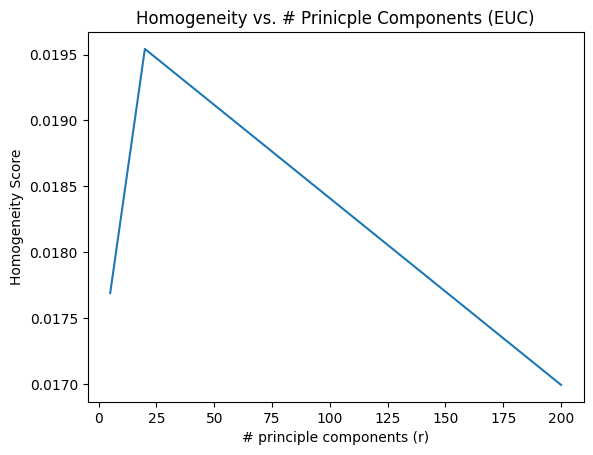

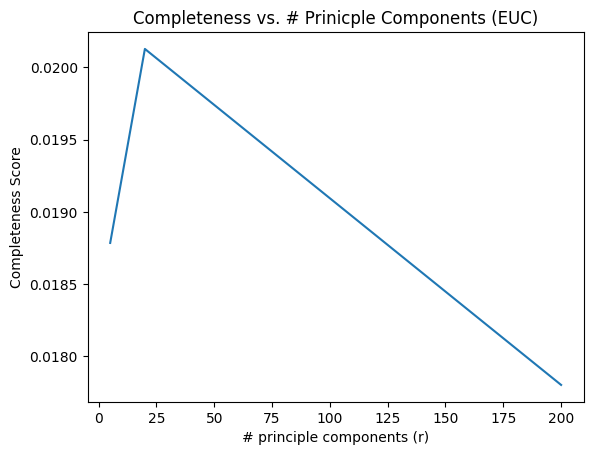

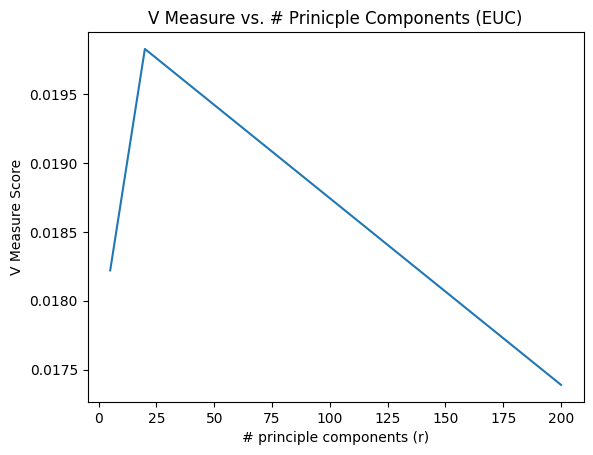

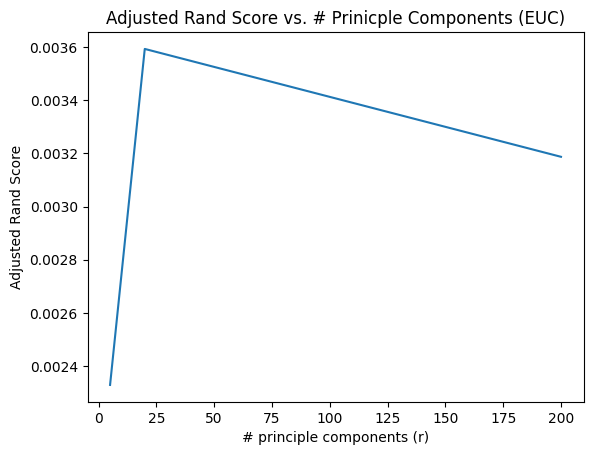

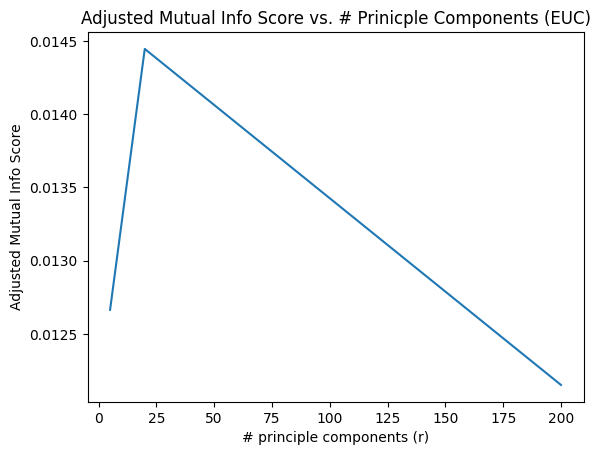

In [68]:
plt.plot(n_components,umap_euc_hs)
plt.xlabel("# principle components (r)")
plt.ylabel("Homogeneity Score")
plt.title("Homogeneity vs. # Prinicple Components (EUC)")
plt.show()

plt.plot(n_components,umap_euc_cs)
plt.xlabel("# principle components (r)")
plt.ylabel("Completeness Score")
plt.title("Completeness vs. # Prinicple Components (EUC)")
plt.show()

plt.plot(n_components,umap_euc_vs)
plt.xlabel("# principle components (r)")
plt.ylabel("V Measure Score")
plt.title("V Measure vs. # Prinicple Components (EUC)")
plt.show()

plt.plot(n_components,umap_euc_ari)
plt.xlabel("# principle components (r)")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score vs. # Prinicple Components (EUC)")
plt.show()

plt.plot(n_components,umap_euc_ms)
plt.xlabel("# principle components (r)")
plt.ylabel("Adjusted Mutual Info Score")
plt.title("Adjusted Mutual Info Score vs. # Prinicple Components (EUC)")
plt.show()

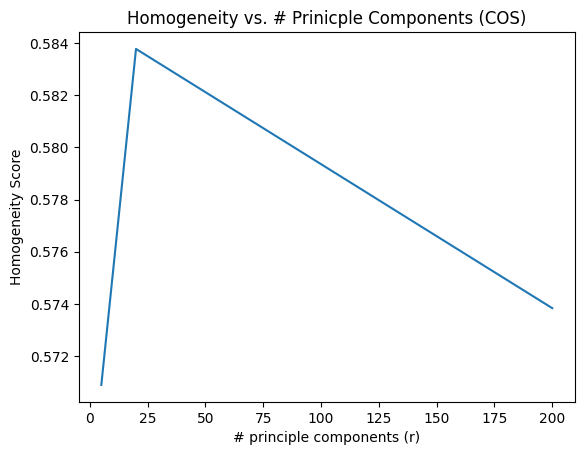

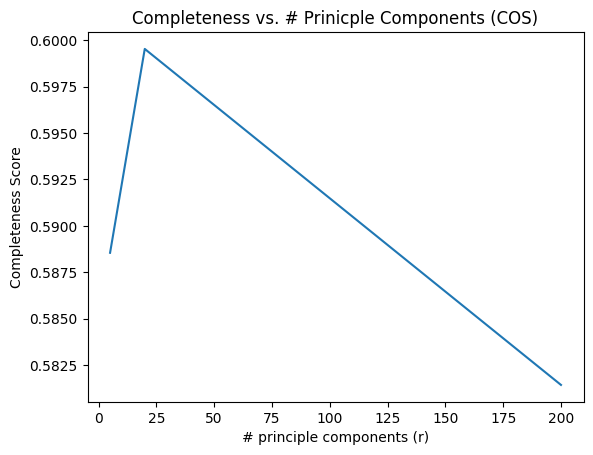

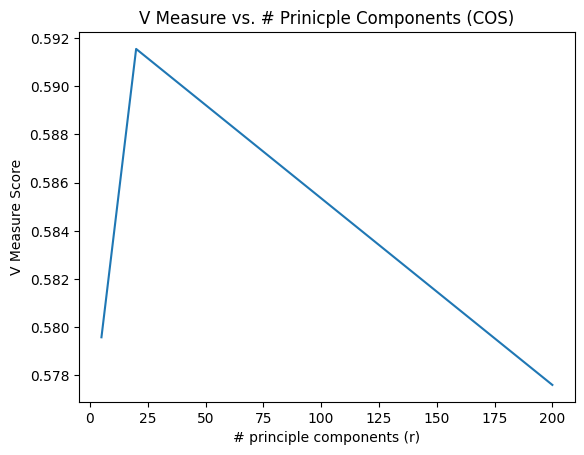

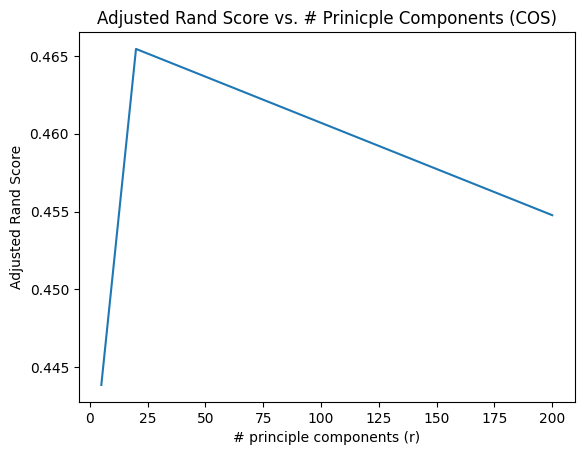

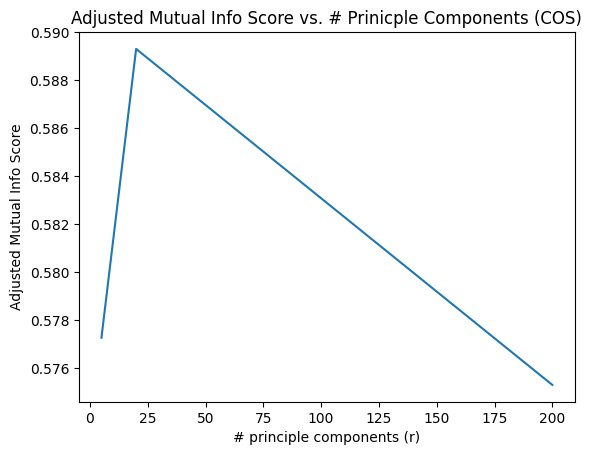

In [69]:
plt.plot(n_components,umap_cos_hs)
plt.xlabel("# principle components (r)")
plt.ylabel("Homogeneity Score")
plt.title("Homogeneity vs. # Prinicple Components (COS)")
plt.show()

plt.plot(n_components,umap_cos_cs)
plt.xlabel("# principle components (r)")
plt.ylabel("Completeness Score")
plt.title("Completeness vs. # Prinicple Components (COS)")
plt.show()

plt.plot(n_components,umap_cos_vs)
plt.xlabel("# principle components (r)")
plt.ylabel("V Measure Score")
plt.title("V Measure vs. # Prinicple Components (COS)")
plt.show()

plt.plot(n_components,umap_cos_ari)
plt.xlabel("# principle components (r)")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score vs. # Prinicple Components (COS)")
plt.show()

plt.plot(n_components,umap_cos_ms)
plt.xlabel("# principle components (r)")
plt.ylabel("Adjusted Mutual Info Score")
plt.title("Adjusted Mutual Info Score vs. # Prinicple Components (COS)")
plt.show()

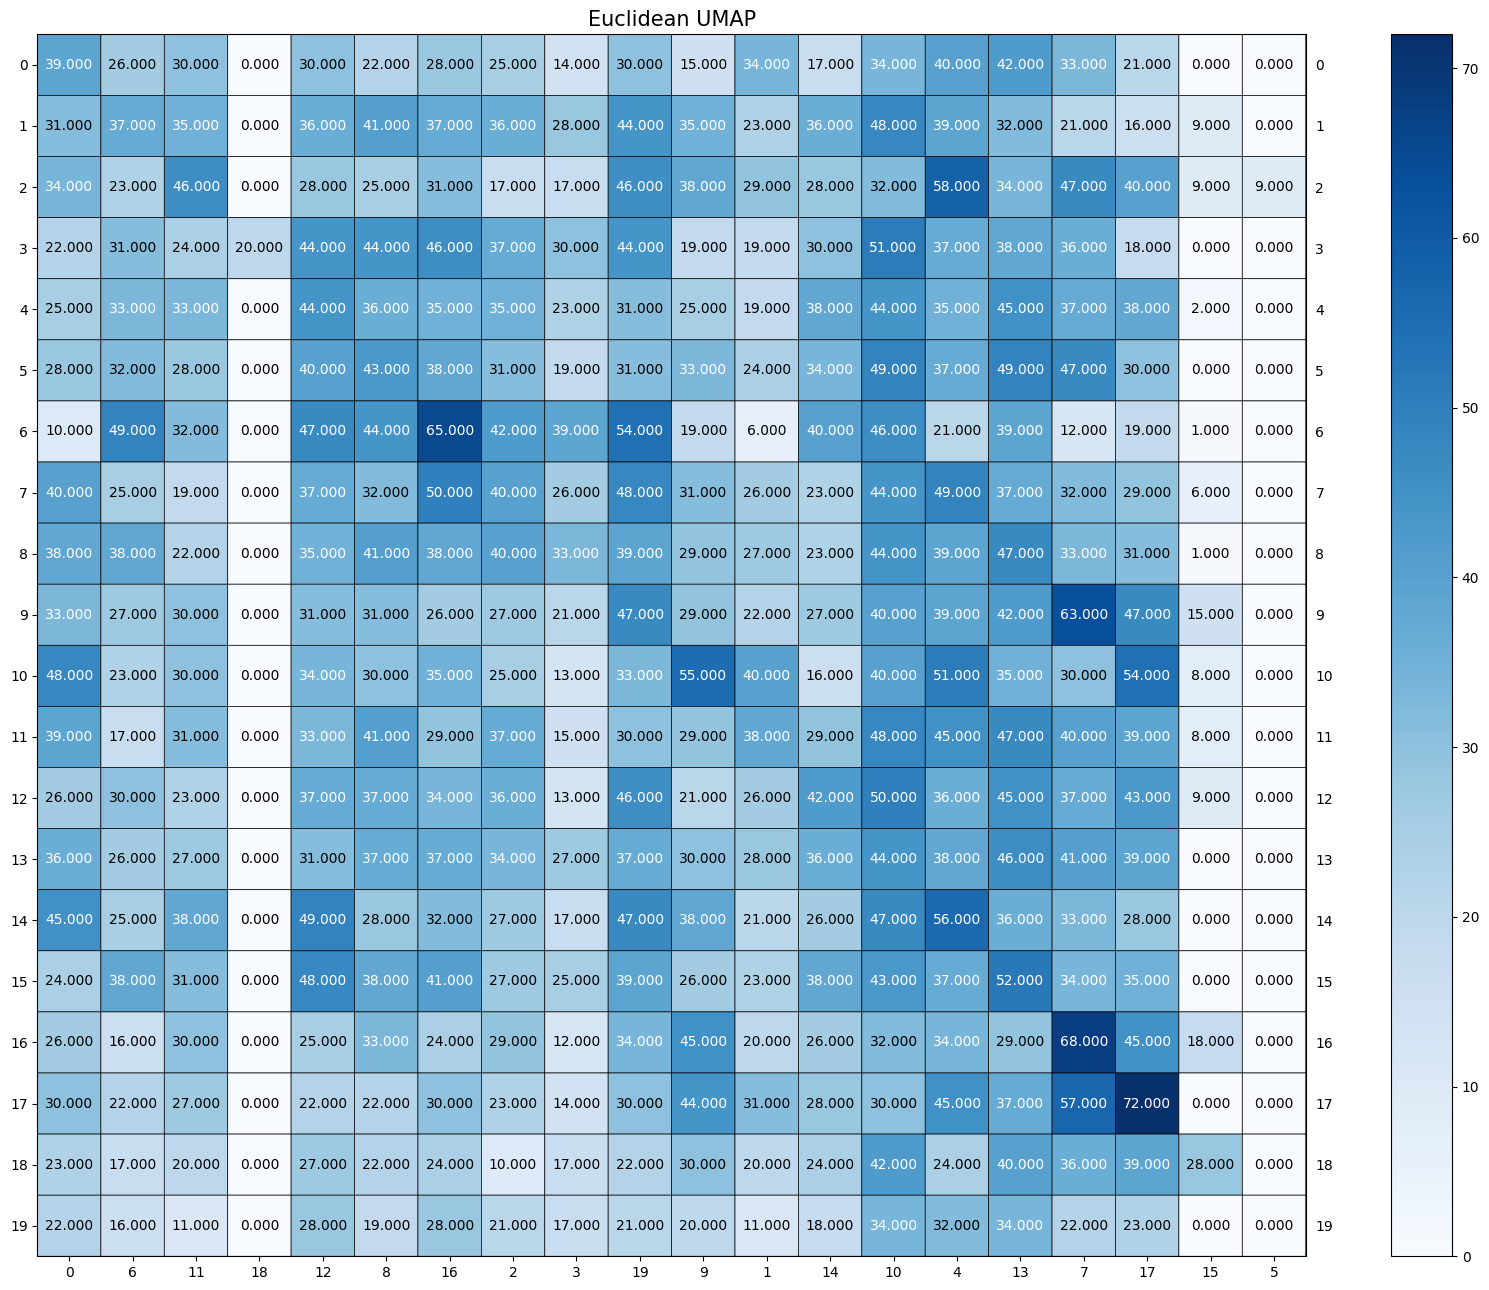

In [70]:
best_umap_euc = umap.UMAP(n_components=20, metric='euclidean').fit_transform(train_data_feat)
kmean_euc = kmeans.fit(best_umap_euc)
cm = confusion_matrix(train_data.target, kmean_euc.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Euclidean UMAP', size=(15,13),pic_fname = 'Q111.png')

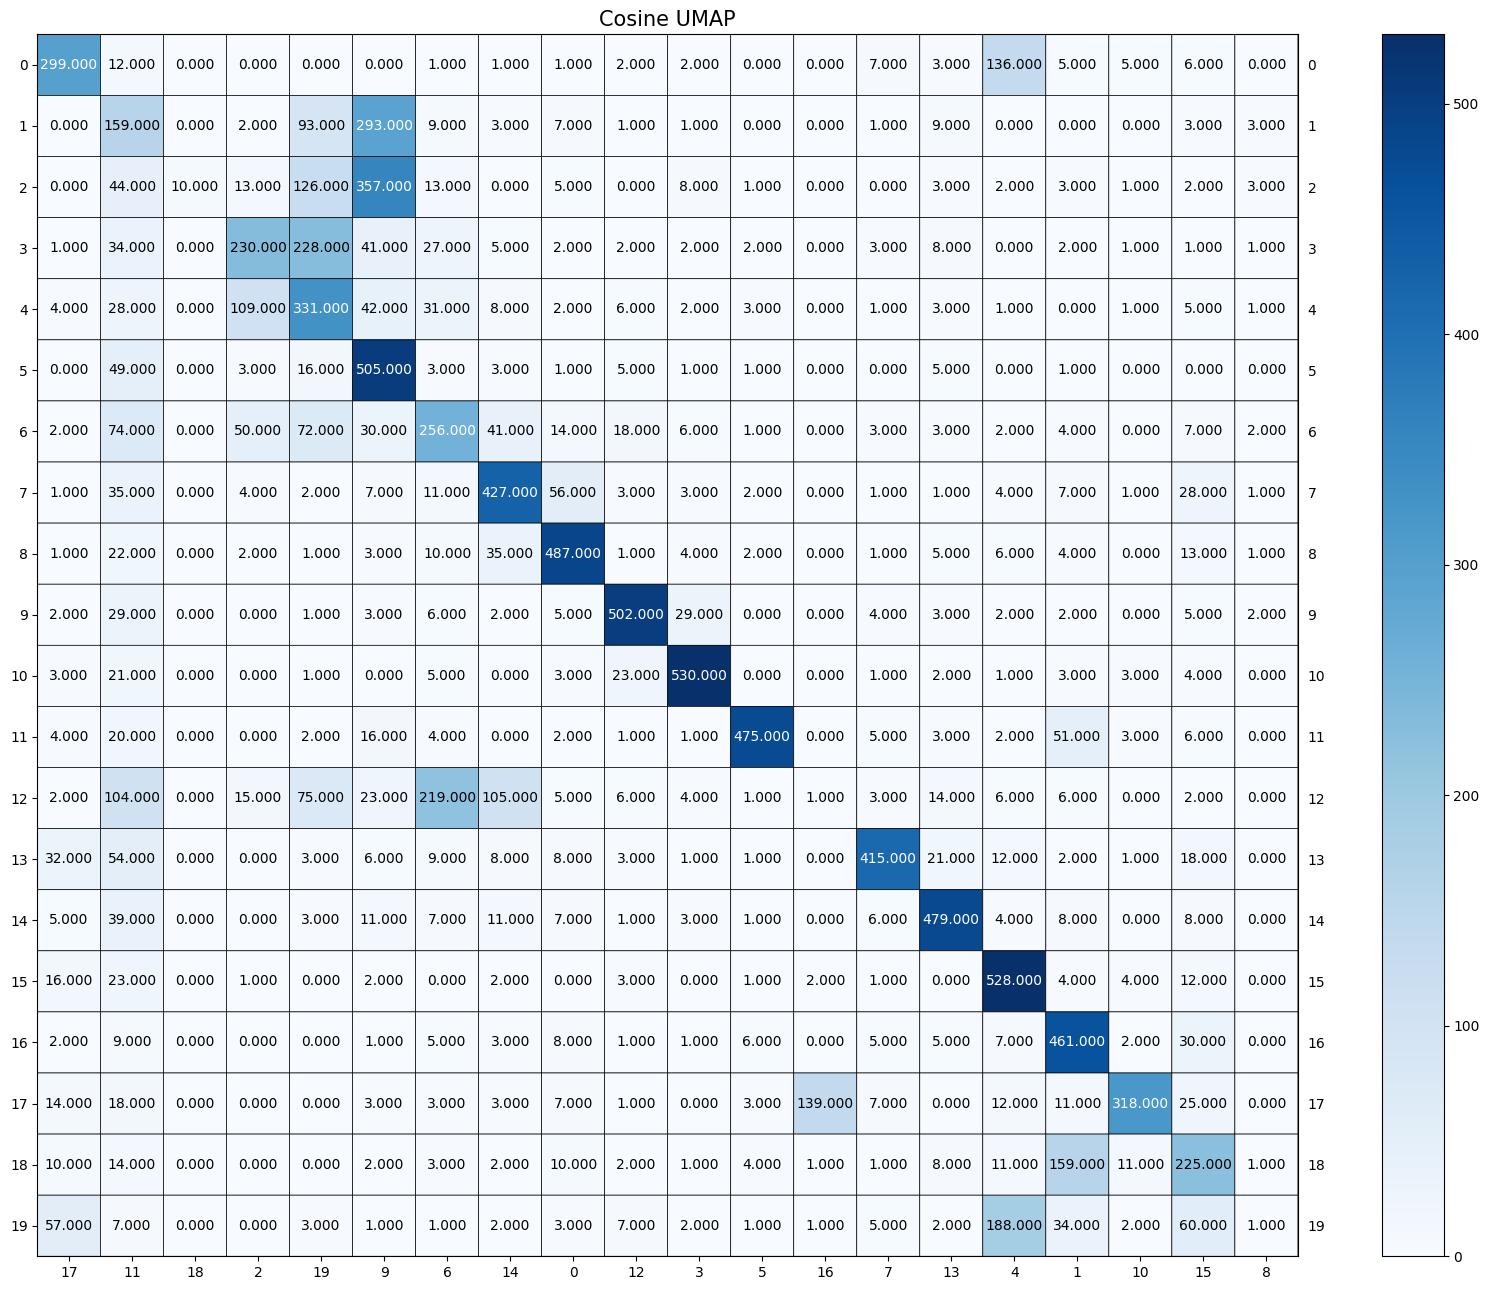

In [72]:
best_umap_cos = umap.UMAP(n_components=20, metric='cosine').fit_transform(train_data_feat)
kmean_cos = kmeans.fit(best_umap_cos)
cm = confusion_matrix(train_data.target, kmean_cos.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Cosine UMAP', size=(15,13))

Question #13

Question #14

In [74]:
agglo_ward = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(best_umap_cos)
print("AgloClustering (Ward) Homogeneity: ", homogeneity_score(train_data.target, agglo_ward.labels_))
print("AgloClustering (Ward) Completeness: ", completeness_score(train_data.target, agglo_ward.labels_))
print("AgloClustering (Ward) V-measure: ", v_measure_score(train_data.target, agglo_ward.labels_))
print("AgloClustering (Ward) Adjusted Rand Index: ", adjusted_rand_score(train_data.target, agglo_ward.labels_))
print("AgloClustering (Ward) Adjusted Mutual Information Score: ", adjusted_mutual_info_score(train_data.target, agglo_ward.labels_))

AgloClustering (Ward) Homogeneity:  0.554968084546283
AgloClustering (Ward) Completeness:  0.5809168547463689
AgloClustering (Ward) V-measure:  0.5676460757724374
AgloClustering (Ward) Adjusted Rand Index:  0.41941355810110637
AgloClustering (Ward) Adjusted Mutual Information Score:  0.5652384293889977


In [75]:
agglo_sing = AgglomerativeClustering(n_clusters=20, linkage='single').fit(best_umap_cos)
print("AgloClustering (Single) Homogeneity: ", homogeneity_score(train_data.target, agglo_sing.labels_))
print("AgloClustering (Single) Completeness: ", completeness_score(train_data.target, agglo_sing.labels_))
print("AgloClustering (Single) V-measure: ", v_measure_score(train_data.target, agglo_sing.labels_))
print("AgloClustering (Singlw) Adjusted Rand Index: ", adjusted_rand_score(train_data.target, agglo_sing.labels_))
print("AgloClustering (Single) Adjusted Mutual Information Score: ", adjusted_mutual_info_score(train_data.target, agglo_sing.labels_))

AgloClustering (Single) Homogeneity:  0.014030539911936233
AgloClustering (Single) Completeness:  0.2860281254935757
AgloClustering (Single) V-measure:  0.026748962742005184
AgloClustering (Singlw) Adjusted Rand Index:  0.00016817700504556486
AgloClustering (Single) Adjusted Mutual Information Score:  0.018655238304537736


Question #15

In [77]:
db_hs = []
db_cs = []
db_vs = []
db_ari = []
db_ms = []

cluster_size = [20, 100, 200]

for size in cluster_size:
    print('Cluster Size: ', size)
    dbs = DBSCAN(min_samples = size,n_jobs=-1).fit_predict(best_umap_cos)
    db_hs.append(homogeneity_score(train_data.target, dbs))
    db_cs.append(completeness_score(train_data.target, dbs))
    db_vs.append(v_measure_score(train_data.target, dbs))
    db_ari.append(adjusted_rand_score(train_data.target, dbs))
    db_ms.append(adjusted_mutual_info_score(train_data.target, dbs)) 

Cluster Size:  20
Cluster Size:  100
Cluster Size:  200


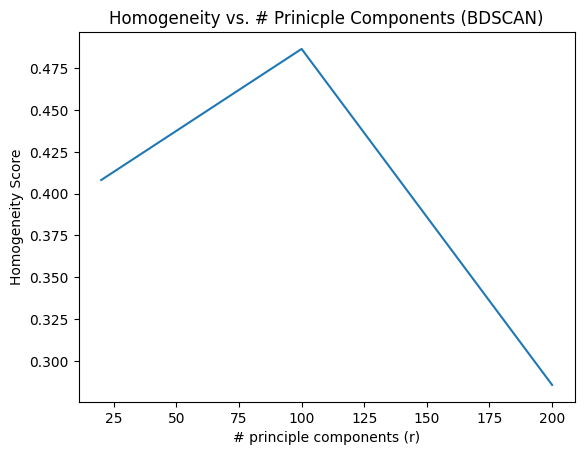

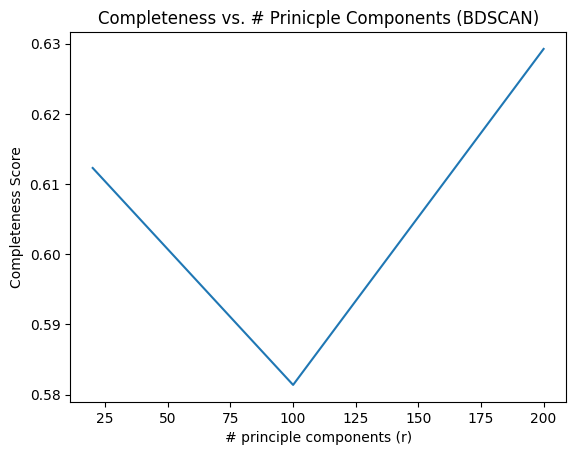

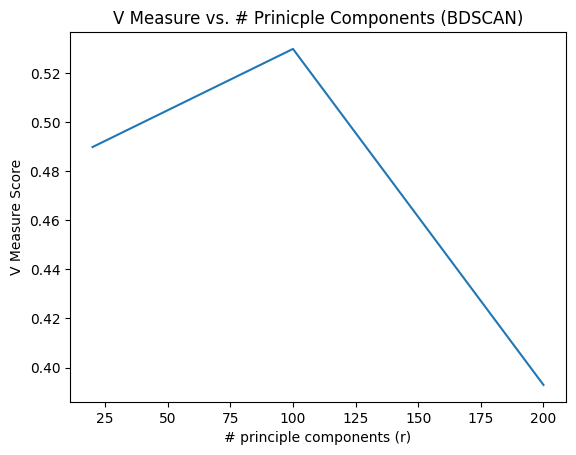

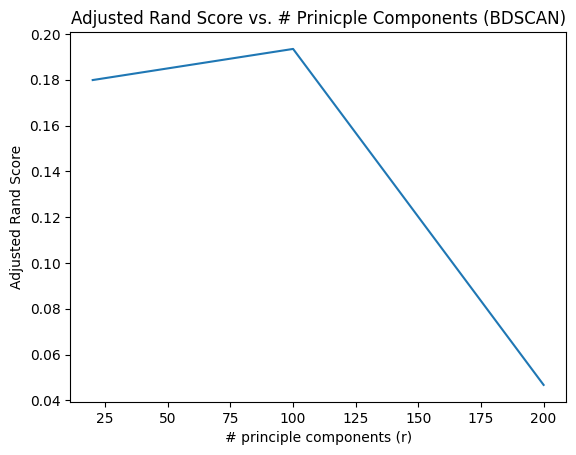

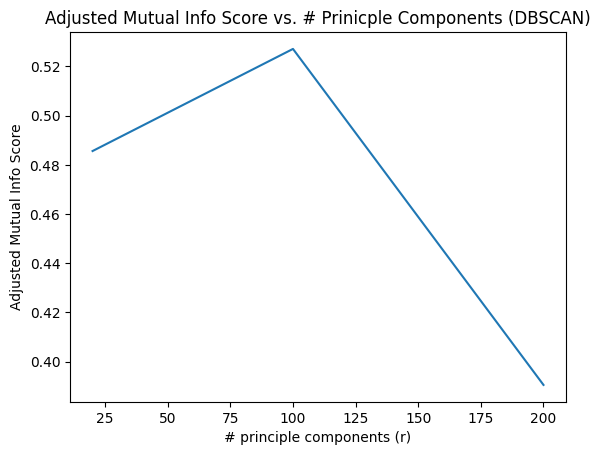

In [80]:
plt.plot(cluster_size,db_hs)
plt.xlabel("# principle components (r)")
plt.ylabel("Homogeneity Score")
plt.title("Homogeneity vs. # Prinicple Components (BDSCAN)")
plt.show()

plt.plot(cluster_size,db_cs)
plt.xlabel("# principle components (r)")
plt.ylabel("Completeness Score")
plt.title("Completeness vs. # Prinicple Components (BDSCAN)")
plt.show()

plt.plot(cluster_size,db_vs)
plt.xlabel("# principle components (r)")
plt.ylabel("V Measure Score")
plt.title("V Measure vs. # Prinicple Components (BDSCAN)")
plt.show()

plt.plot(cluster_size,db_ari)
plt.xlabel("# principle components (r)")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score vs. # Prinicple Components (BDSCAN)")
plt.show()

plt.plot(cluster_size,db_ms)
plt.xlabel("# principle components (r)")
plt.ylabel("Adjusted Mutual Info Score")
plt.title("Adjusted Mutual Info Score vs. # Prinicple Components (DBSCAN)")
plt.show()

Question #16

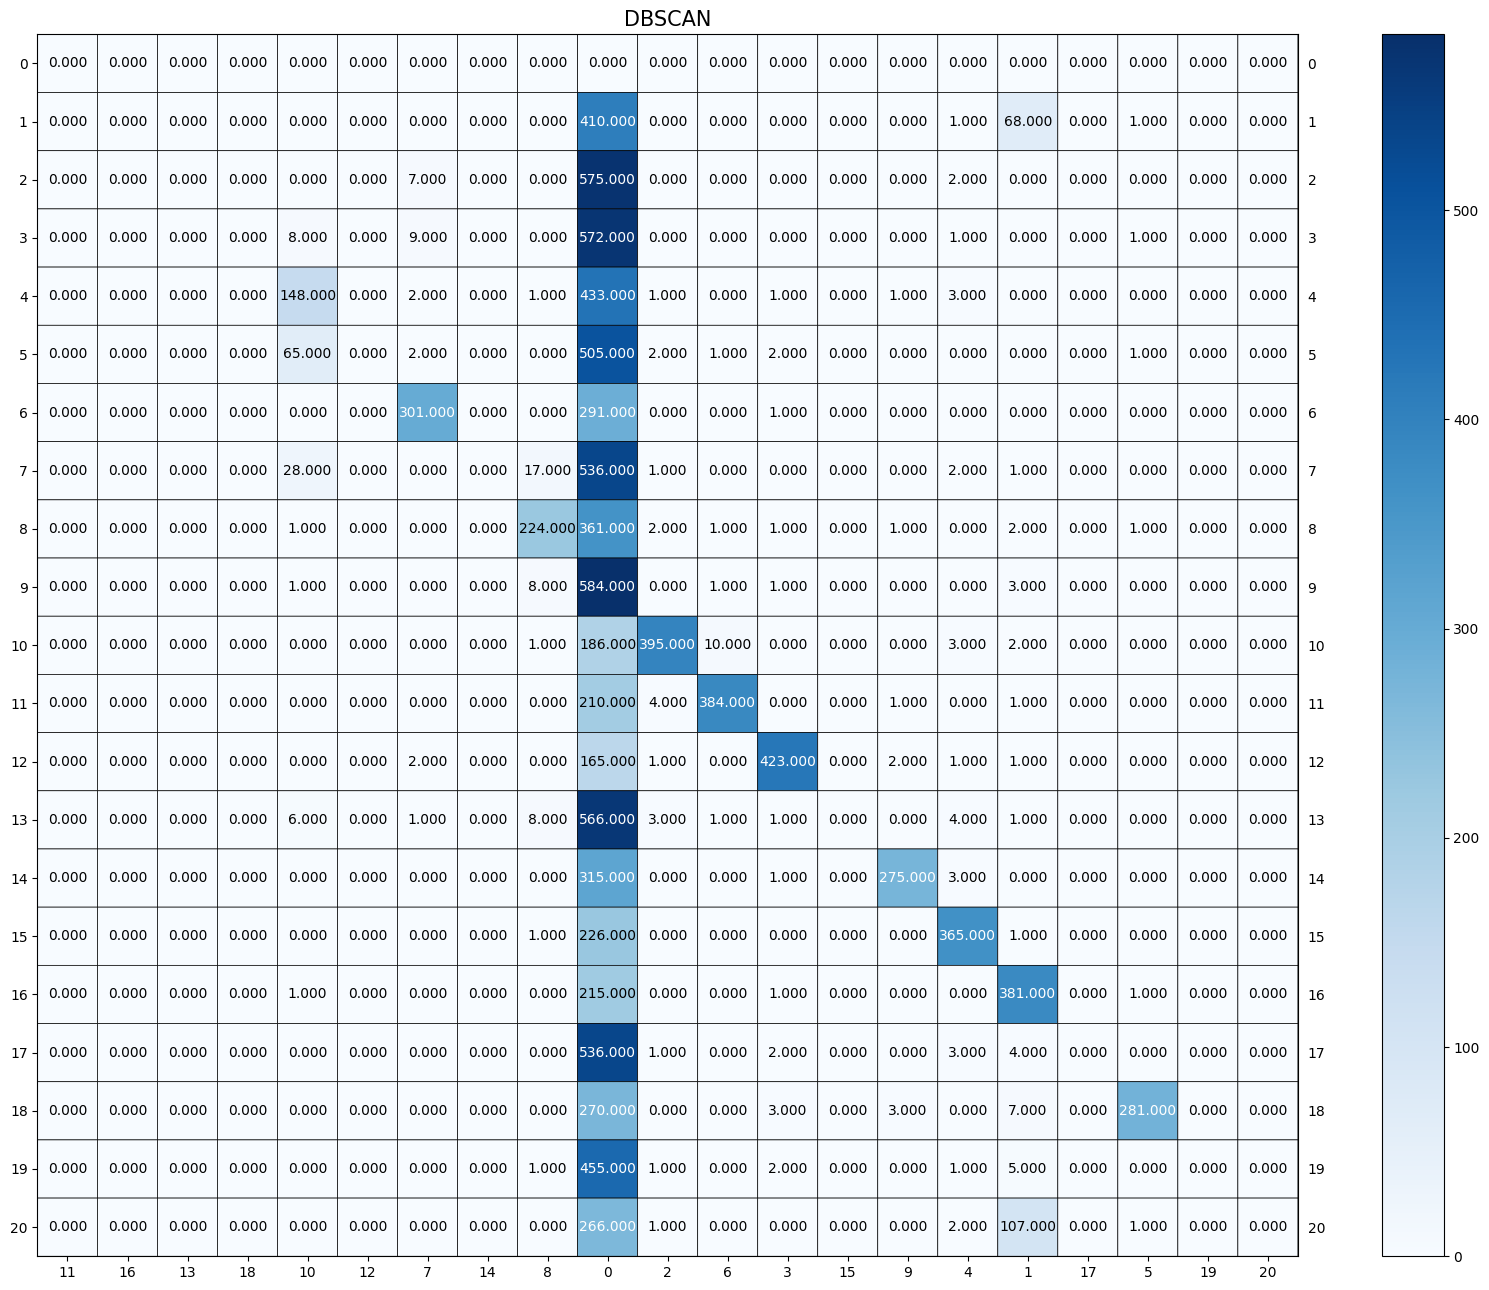

In [81]:
best_bdscan = DBSCAN(min_samples = size,n_jobs=-1).fit_predict(best_umap_cos)
cm = confusion_matrix(train_data.target, best_bdscan)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'DBSCAN', size=(15,13))

Question #17

In [7]:
k = [5, 20, 200]
svd_hs = []
svd_cs = []
svd_vs = []
svd_ari = []
svd_ms = []
nmf_hs = []
nmf_cs = []
nmf_vs = []
nmf_ari = []
nmf_ms = []

for r in k:
  print("SVD component: ", r)
  svd = TruncatedSVD(n_components=r)
  svd_km = svd.fit_transform(train_data_feat)
  kmean_svd = kmeans.fit(svd_km)
  svd_hs.append(homogeneity_score(train_data.target, kmean_svd.labels_))
  svd_cs.append(completeness_score(train_data.target, kmean_svd.labels_))
  svd_vs.append(v_measure_score(train_data.target, kmean_svd.labels_))
  svd_ari.append(adjusted_rand_score(train_data.target, kmean_svd.labels_))
  svd_ms.append(adjusted_mutual_info_score(train_data.target, kmean_svd.labels_))    
  print("NMF component: ", r)
  nmf = NMF(n_components=r)
  nmf_km = nmf.fit_transform(train_data_feat)
  kmean_nmf = kmeans.fit(nmf_km)
  nmf_hs.append(homogeneity_score(train_data.target, kmean_nmf.labels_))
  nmf_cs.append(completeness_score(train_data.target, kmean_nmf.labels_))
  nmf_vs.append(v_measure_score(train_data.target, kmean_nmf.labels_))
  nmf_ari.append(adjusted_rand_score(train_data.target, kmean_nmf.labels_))
  nmf_ms.append(adjusted_mutual_info_score(train_data.target, kmean_nmf.labels_))

SVD component:  5
NMF component:  5
SVD component:  20
NMF component:  20
SVD component:  200
NMF component:  200


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Question #18

In [10]:
svd5 = TruncatedSVD(n_components=5)
svd20 = TruncatedSVD(n_components=20)
svd200 = TruncatedSVD(n_components=200)
nmf5 = NMF(n_components=5)
nmf20 = NMF(n_components=20)
nmf200 = NMF(n_components=200)
umap_cos5 = umap.UMAP(n_components=5, metric='cosine')
umap_cos20 = umap.UMAP(n_components=20, metric='cosine')
umap_cos200 = umap.UMAP(n_components=200, metric='cosine')

In [11]:
svd5_km = svd5.fit_transform(train_data_feat)
svd20_km = svd20.fit_transform(train_data_feat)
svd200_km = svd200.fit_transform(train_data_feat)

nmf5_km = nmf5.fit_transform(train_data_feat)
nmf20_km = nmf20.fit_transform(train_data_feat)
nmf200_km = nmf200.fit_transform(train_data_feat)

umap5_km = umap_cos5.fit_transform(train_data_feat)
umap20_km = umap_cos20.fit_transform(train_data_feat)
umap200_km = umap_cos200.fit_transform(train_data_feat)

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [12]:
comps = [10,20, 50]
for n in comps:
    print(f'--- Cluster Size: {n}---')
    kmeans_svd5 = KMeans(n_clusters=n, max_iter = 5000, n_init = 30, random_state=0).fit(svd5_km)
    kmeans_svd20 = KMeans(n_clusters=n, max_iter = 5000, n_init = 30, random_state=0).fit(svd20_km)
    kmeans_svd200 = KMeans(n_clusters=n, max_iter = 5000, n_init = 30, random_state=0).fit(svd200_km)

    kmeans_nmf5 = KMeans(n_clusters=n, max_iter = 5000, n_init = 30, random_state=0).fit(nmf5_km)
    kmeans_nmf20 = KMeans(n_clusters=n, max_iter = 5000, n_init = 30, random_state=0).fit(nmf20_km)
    kmeans_nmf200 = KMeans(n_clusters=n, max_iter = 5000, n_init = 30, random_state=0).fit(nmf200_km)

    kmeans_umap5 = KMeans(n_clusters=n, max_iter = 5000, n_init = 30, random_state=0).fit(umap5_km)
    kmeans_umap20 = KMeans(n_clusters=n, max_iter = 5000, n_init = 30, random_state=0).fit(umap20_km)
    kmeans_umap200 = KMeans(n_clusters=n, max_iter = 5000, n_init = 30, random_state=0).fit(umap200_km)

    print('- Kmeans + SVD(5) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, kmeans_svd5.labels_))
    print("Completenes Score: ", completeness_score(train_data.target, kmeans_svd5.labels_))
    print("V measure Score: ", v_measure_score(train_data.target, kmeans_svd5.labels_))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, kmeans_svd5.labels_))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, kmeans_svd5.labels_)) 

    print('- Kmeans + SVD(20) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, kmeans_svd20.labels_))
    print("Completenes Score: ", completeness_score(train_data.target, kmeans_svd20.labels_))
    print("V measure Score: ", v_measure_score(train_data.target, kmeans_svd20.labels_))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, kmeans_svd20.labels_))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, kmeans_svd20.labels_))  

    print('- Kmeans + SVD(200) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, kmeans_svd200.labels_))
    print("Completenes Score: ", completeness_score(train_data.target, kmeans_svd200.labels_))
    print("V measure Score: ", v_measure_score(train_data.target, kmeans_svd200.labels_))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, kmeans_svd200.labels_))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, kmeans_svd200.labels_)) 

    print('- Kmeans + NMF(5) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, kmeans_nmf5.labels_))
    print("Completenes Score: ", completeness_score(train_data.target, kmeans_nmf5.labels_))
    print("V measure Score: ", v_measure_score(train_data.target, kmeans_nmf5.labels_))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, kmeans_nmf5.labels_))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, kmeans_nmf5.labels_)) 

    print('- Kmeans + NMF(20) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, kmeans_nmf20.labels_))
    print("Completenes Score: ", completeness_score(train_data.target, kmeans_nmf20.labels_))
    print("V measure Score: ", v_measure_score(train_data.target, kmeans_nmf20.labels_))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, kmeans_nmf20.labels_))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, kmeans_nmf20.labels_)) 

    print('- Kmeans + NMF(200) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, kmeans_nmf200.labels_))
    print("Completenes Score: ", completeness_score(train_data.target, kmeans_nmf200.labels_))
    print("V measure Score: ", v_measure_score(train_data.target, kmeans_nmf200.labels_))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, kmeans_nmf200.labels_))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, kmeans_nmf200.labels_)) 

    print('- Kmeans + UMAP(5) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, kmeans_umap5.labels_))
    print("Completenes Score: ", completeness_score(train_data.target, kmeans_umap5.labels_))
    print("V measure Score: ", v_measure_score(train_data.target, kmeans_umap5.labels_))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, kmeans_umap5.labels_))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, kmeans_umap5.labels_)) 

    print('- Kmeans + UMAP(20) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, kmeans_umap20.labels_))
    print("Completenes Score: ", completeness_score(train_data.target, kmeans_umap20.labels_))
    print("V measure Score: ", v_measure_score(train_data.target, kmeans_umap20.labels_))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, kmeans_umap20.labels_))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, kmeans_umap20.labels_)) 

    print('- Kmeans + UMAP(200) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, kmeans_umap200.labels_))
    print("Completenes Score: ", completeness_score(train_data.target, kmeans_umap200.labels_))
    print("V measure Score: ", v_measure_score(train_data.target, kmeans_umap200.labels_))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, kmeans_umap200.labels_))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, kmeans_umap200.labels_)) 


--- Cluster Size: 10---
- Kmeans + SVD(5) -
Homogeneity Score:  0.2601147251679183
Completenes Score:  0.3936316788040743
V measure Score:  0.3132388807874638
Adjusted Rand Score:  0.10348431098673369
Adjusted Mutual Info Score:  0.31112622609838786
- Kmeans + SVD(20) -
Homogeneity Score:  0.2640101287546547
Completenes Score:  0.4130099735785623
V measure Score:  0.32211396951331833
Adjusted Rand Score:  0.09751032695073829
Adjusted Mutual Info Score:  0.32000041257891804
- Kmeans + SVD(200) -
Homogeneity Score:  0.3027524161538866
Completenes Score:  0.5289330035181524
V measure Score:  0.3850872962563168
Adjusted Rand Score:  0.0918091162803225
Adjusted Mutual Info Score:  0.3830862698286716
- Kmeans + NMF(5) -
Homogeneity Score:  0.22797950804318665
Completenes Score:  0.37579544579700824
V measure Score:  0.28379335814697526
Adjusted Rand Score:  0.07323550379110838
Adjusted Mutual Info Score:  0.2815090690716598
- Kmeans + NMF(20) -
Homogeneity Score:  0.1757416513006931
Complete

In [14]:
print('Agglo (20)')

agglo_ward_svd5 = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(svd5_km)
agglo_ward_svd20 = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(svd20_km)
agglo_ward_svd200 = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(svd200_km)

agglo_ward_nmf5 = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(nmf5_km)
agglo_ward_nmf20 = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(nmf20_km)
agglo_ward_nmf200 = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(nmf200_km)

agglo_ward_umap5 = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(umap5_km)
agglo_ward_umap20 = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(umap20_km)
agglo_ward_umap200 = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(umap200_km)


print('- Agglo + SVD(5) -')
print("Homogeneity Score: ", homogeneity_score(train_data.target, agglo_ward_svd5.labels_))
print("Completenes Score: ", completeness_score(train_data.target, agglo_ward_svd5.labels_))
print("V measure Score: ", v_measure_score(train_data.target, agglo_ward_svd5.labels_))
print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, agglo_ward_svd5.labels_))
print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, agglo_ward_svd5.labels_)) 

print('- Agglo + SVD(20) -')
print("Homogeneity Score: ", homogeneity_score(train_data.target, agglo_ward_svd20.labels_))
print("Completenes Score: ", completeness_score(train_data.target, agglo_ward_svd20.labels_))
print("V measure Score: ", v_measure_score(train_data.target, agglo_ward_svd20.labels_))
print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, agglo_ward_svd20.labels_))
print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, agglo_ward_svd20.labels_))  

print('- Agglo + SVD(200) -')
print("Homogeneity Score: ", homogeneity_score(train_data.target, agglo_ward_svd200.labels_))
print("Completenes Score: ", completeness_score(train_data.target, agglo_ward_svd200.labels_))
print("V measure Score: ", v_measure_score(train_data.target, agglo_ward_svd200.labels_))
print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, agglo_ward_svd200.labels_))
print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, agglo_ward_svd200.labels_)) 

print('- Aglo+ NMF(5) -')
print("Homogeneity Score: ", homogeneity_score(train_data.target, agglo_ward_nmf5.labels_))
print("Completenes Score: ", completeness_score(train_data.target, agglo_ward_nmf5.labels_))
print("V measure Score: ", v_measure_score(train_data.target, agglo_ward_nmf5.labels_))
print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, agglo_ward_nmf5.labels_))
print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, agglo_ward_nmf5.labels_)) 

print('- Aglo + NMF(20) -')
print("Homogeneity Score: ", homogeneity_score(train_data.target, agglo_ward_nmf20.labels_))
print("Completenes Score: ", completeness_score(train_data.target, agglo_ward_nmf20.labels_))
print("V measure Score: ", v_measure_score(train_data.target, agglo_ward_nmf20.labels_))
print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, agglo_ward_nmf20.labels_))
print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, agglo_ward_nmf20.labels_)) 

print('- Aglo + NMF(200) -')
print("Homogeneity Score: ", homogeneity_score(train_data.target, agglo_ward_nmf200.labels_))
print("Completenes Score: ", completeness_score(train_data.target, agglo_ward_nmf200.labels_))
print("V measure Score: ", v_measure_score(train_data.target, agglo_ward_nmf200.labels_))
print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, agglo_ward_nmf200.labels_))
print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, agglo_ward_nmf200.labels_)) 

print('- Aglo + UMAP(5) -')
print("Homogeneity Score: ", homogeneity_score(train_data.target, agglo_ward_umap5.labels_))
print("Completenes Score: ", completeness_score(train_data.target, agglo_ward_umap5.labels_))
print("V measure Score: ", v_measure_score(train_data.target, agglo_ward_umap5.labels_))
print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, agglo_ward_umap5.labels_))
print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, agglo_ward_umap5.labels_)) 

print('- Aglo + UMAP(20) -')
print("Homogeneity Score: ", homogeneity_score(train_data.target, agglo_ward_umap20.labels_))
print("Completenes Score: ", completeness_score(train_data.target, agglo_ward_umap20.labels_))
print("V measure Score: ", v_measure_score(train_data.target, agglo_ward_umap20.labels_))
print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, agglo_ward_umap20.labels_))
print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, agglo_ward_umap20.labels_)) 

print('- Aglo + UMAP(200) -')
print("Homogeneity Score: ", homogeneity_score(train_data.target, agglo_ward_umap200.labels_))
print("Completenes Score: ", completeness_score(train_data.target, agglo_ward_umap200.labels_))
print("V measure Score: ", v_measure_score(train_data.target, agglo_ward_umap200.labels_))
print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, agglo_ward_umap200.labels_))
print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, agglo_ward_umap200.labels_)) 


Agglo (20)
- Agglo + SVD(5) -
Homogeneity Score:  0.28868564406339986
Completenes Score:  0.33748786721576923
V measure Score:  0.3111850008210612
Adjusted Rand Score:  0.09974282545883698
Adjusted Mutual Info Score:  0.3071162984581765
- Agglo + SVD(20) -
Homogeneity Score:  0.3671326792855669
Completenes Score:  0.4197758060461355
V measure Score:  0.3916933652278851
Adjusted Rand Score:  0.15872573679131907
Adjusted Mutual Info Score:  0.38815069030319144
- Agglo + SVD(200) -
Homogeneity Score:  0.33718315550040917
Completenes Score:  0.4774633564225193
V measure Score:  0.39524529669769876
Adjusted Rand Score:  0.10628382058048479
Adjusted Mutual Info Score:  0.39129134286318695
- Aglo+ NMF(5) -
Homogeneity Score:  0.26246399469213727
Completenes Score:  0.3234727465096395
V measure Score:  0.2897922019664591
Adjusted Rand Score:  0.08188985574706323
Adjusted Mutual Info Score:  0.2854343726512652
- Aglo + NMF(20) -
Homogeneity Score:  0.3462246879166777
Completenes Score:  0.40368

In [19]:
import hdbscan

In [25]:
comps = [100, 200]
for n in comps:
    print(f'--- Cluster Size: {n}---')
    hdbs_svd5 = hdbscan.HDBSCAN(min_samples = n).fit_predict(svd5_km)
    hdbs_svd20 = hdbscan.HDBSCAN(min_samples = n ).fit_predict(svd20_km)
    hdbs_svd200 = hdbscan.HDBSCAN(min_samples = n ).fit_predict(svd200_km)

    hdbs_nmf5 = hdbscan.HDBSCAN(min_samples = n ).fit_predict(nmf5_km)
    hdbs_nmf20 = hdbscan.HDBSCAN(min_samples = n ).fit_predict(nmf20_km)
    hdbs_nmf200 = hdbscan.HDBSCAN(min_samples = n ).fit_predict(nmf200_km)
	
    hdbs_umap5 = hdbscan.HDBSCAN(min_samples = n ).fit_predict(umap5_km)
    hdbs_umap20 = hdbscan.HDBSCAN(min_samples = n ).fit_predict(umap20_km)
    hdbs_umap200 = hdbscan.HDBSCAN(min_samples = n ).fit_predict(umap200_km)
	
    print('- HDBSCAN + SVD(5) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, hdbs_svd5))
    print("Completenes Score: ", completeness_score(train_data.target, hdbs_svd5))
    print("V measure Score: ", v_measure_score(train_data.target, hdbs_svd5))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, hdbs_svd5))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, hdbs_svd5)) 

    print('- HDBSCAN + SVD(20) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, hdbs_svd20))
    print("Completenes Score: ", completeness_score(train_data.target, hdbs_svd20))
    print("V measure Score: ", v_measure_score(train_data.target, hdbs_svd20))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, hdbs_svd20))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, hdbs_svd20))  

    print('- HDBSCAN + SVD(200) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, hdbs_svd200))
    print("Completenes Score: ", completeness_score(train_data.target, hdbs_svd200))
    print("V measure Score: ", v_measure_score(train_data.target, hdbs_svd200))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, hdbs_svd200))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, hdbs_svd200)) 

    print('- HDBSCAN + NMF(5) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, hdbs_nmf5))
    print("Completenes Score: ", completeness_score(train_data.target, hdbs_nmf5))
    print("V measure Score: ", v_measure_score(train_data.target, hdbs_nmf5))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, hdbs_nmf5))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, hdbs_nmf5)) 

    print('- HDBSCAN + NMF(20) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, hdbs_nmf20))
    print("Completenes Score: ", completeness_score(train_data.target, hdbs_nmf20))
    print("V measure Score: ", v_measure_score(train_data.target, hdbs_nmf20))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, hdbs_nmf20))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, hdbs_nmf20)) 

    print('- HDBSCAN + NMF(200) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, hdbs_nmf200))
    print("Completenes Score: ", completeness_score(train_data.target, hdbs_nmf200))
    print("V measure Score: ", v_measure_score(train_data.target, hdbs_nmf200))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, hdbs_nmf200))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, hdbs_nmf200)) 

    print('- HDBSCAN + UMAP(5) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, hdbs_umap5))
    print("Completenes Score: ", completeness_score(train_data.target, hdbs_umap5))
    print("V measure Score: ", v_measure_score(train_data.target, hdbs_umap5))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, hdbs_umap5))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, hdbs_umap5)) 

    print('- HDBSCAN + UMAP(20) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, hdbs_umap20))
    print("Completenes Score: ", completeness_score(train_data.target, hdbs_umap20))
    print("V measure Score: ", v_measure_score(train_data.target, hdbs_umap20))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, hdbs_umap20))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, hdbs_umap20)) 

    print('- HDBSCAN + UMAP(200) -')
    print("Homogeneity Score: ", homogeneity_score(train_data.target, hdbs_umap200))
    print("Completenes Score: ", completeness_score(train_data.target, hdbs_umap200))
    print("V measure Score: ", v_measure_score(train_data.target, hdbs_umap200))
    print("Adjusted Rand Score: ", adjusted_rand_score(train_data.target, hdbs_umap200))
    print("Adjusted Mutual Info Score: ", adjusted_mutual_info_score(train_data.target, hdbs_umap200)) 


--- Cluster Size: 100---
- HDBSCAN + SVD(5) -
Homogeneity Score:  0.014605857183225995
Completenes Score:  0.124495910785101
V measure Score:  0.026144448332775565
Adjusted Rand Score:  0.0021788344226763446
Adjusted Mutual Info Score:  0.02514840038479794
- HDBSCAN + SVD(20) -
Homogeneity Score:  0.000831277143662307
Completenes Score:  0.06790694303986584
V measure Score:  0.001642448393173431
Adjusted Rand Score:  3.7341234138001544e-06
Adjusted Mutual Info Score:  0.00035298199838264033
- HDBSCAN + SVD(200) -
Homogeneity Score:  0.0
Completenes Score:  1.0
V measure Score:  0.0
Adjusted Rand Score:  0.0
Adjusted Mutual Info Score:  0.0
- HDBSCAN + NMF(5) -
Homogeneity Score:  0.06459875295801151
Completenes Score:  0.29056015439951755
V measure Score:  0.10569817197123556
Adjusted Rand Score:  0.024286120875656327
Adjusted Mutual Info Score:  0.10361262652138661
- HDBSCAN + NMF(20) -
Homogeneity Score:  0.009357488870119243
Completenes Score:  0.08239592261912565
V measure Score:  

# Part #2

Question #19